#  Gated Recurrent Unit

**Gated Recurrent Unit (GRU)** is a type of recurrent neural network (RNN) designed to effectively model sequential data while addressing the vanishing gradient problem that affects traditional RNNs. Introduced by Cho et al. in 2014, GRUs are widely used in natural language processing, time series prediction, and other sequence-based tasks.

GRUs simplify the architecture of the Long Short-Term Memory (LSTM) network by combining the hidden and cell states into a single vector and using only two gates: the **reset gate** and the **update gate**. The **reset gate** controls how much past information to forget, and the **update gate** determines how much of the new input should be passed into the hidden state.

Unlike LSTMs, GRUs do not have a separate output gate, making them computationally more efficient with fewer parameters. This simplicity often allows GRUs to train faster and perform better on smaller datasets or shorter sequences, while still maintaining the ability to learn dependencies across time.

Despite lacking the full control of LSTM’s gating mechanisms, GRUs have demonstrated comparable performance in many tasks. Their balance of efficiency and capability makes them a popular choice when computational resources are limited or when rapid experimentation is needed.


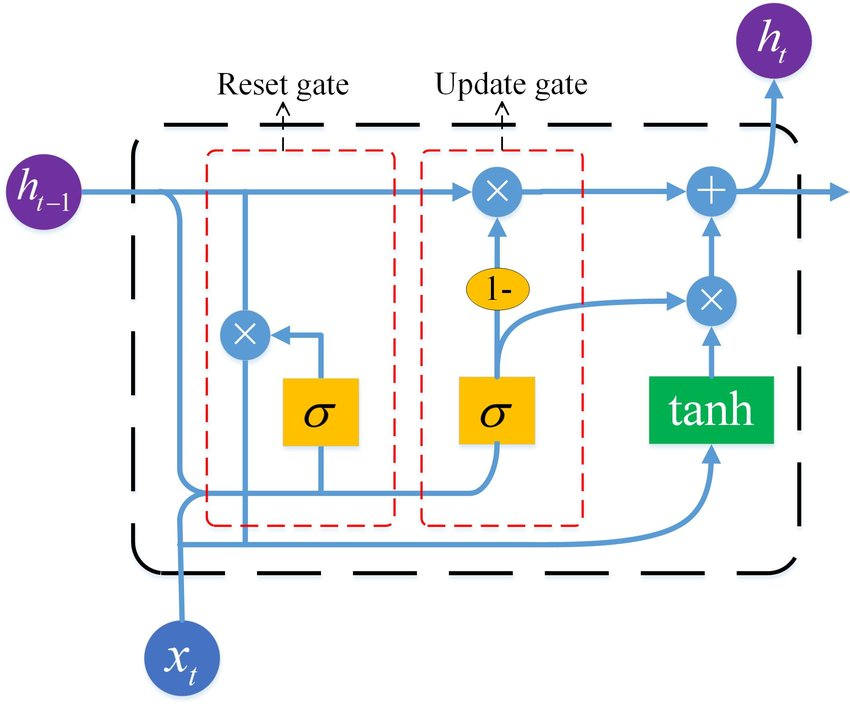

# Reset Gate
The reset gate in a Gated Recurrent Unit (GRU) controls how much of the previous hidden state should be forgotten when computing the new candidate state. It helps the model decide whether to ignore past information for the current input. When the reset gate value is close to 0, the model forgets previous memory, making it rely more on the current input. When it’s near 1, it keeps more past context. This is especially useful when recent information is more relevant than older context, such as in sequences with abrupt changes in topic or sentiment.

# Update Gate
The update gate in a GRU determines how much of the previous hidden state should be carried forward to the next time step. It acts like a memory filter, balancing the influence of past and new information. If the update gate is near 1, the model retains most of the past state, preserving long-term dependencies. If it’s near 0, the model updates more aggressively with new input. This gate effectively replaces the input and forget gates in an LSTM, simplifying the architecture while still controlling memory flow, making it essential for tracking information over time in sequential data.

# Sample Code

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
ananthr1_weather_prediction_path = kagglehub.dataset_download('ananthr1/weather-prediction')

print('Data source import complete.')


Data source import complete.


In [ ]:
ananthr1_weather_prediction_path

'/kaggle/input/weather-prediction'

In [ ]:
path=ananthr1_weather_prediction_path+"/seattle-weather.csv"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(path)

In [ ]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [ ]:
df.isnull().sum()

,0
date,0
precipitation,0
temp_max,0
temp_min,0
wind,0
weather,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
#coulmn Open converted into numpy array
training_set = df.iloc[:,2:3].values
training_set

array([[12.8],
       [10.6],
       [11.7],
       ...,
       [ 7.2],
       [ 5.6],
       [ 5.6]])

In [ ]:
len(training_set)

1461

In [ ]:
def df_to_XY(df,window_size=10):
 X_train=[]
 y_train=[]

 for i in range(10,len(training_set)):
    X_train.append(training_set[i-10:i,0])
    y_train.append(training_set[i,0])

 X_train, y_train = np.array(X_train), np.array(y_train)
 return X_train, y_train

In [ ]:
WINDOW = 10
X,y = df_to_XY(df,WINDOW)
print(len(X),len(y))
X_train = X[:800]
y_train = y[:800]
X_val = X[800:1000]
y_val = y[800:1000]
X_test = X[1000:]
x_test = y[1000:]

1451 1451


In [ ]:
#Reshaping(To add new dimensions)
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_val = np.reshape(X_val,(X_val.shape[0],X_val.shape[1],1))
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, GRU, Dropout

# Initializing the GRU model
regressor = Sequential()

# Adding the first GRU layer and Dropout regularization
regressor.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding additional GRU layers with Dropout
regressor.add(GRU(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(GRU(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(GRU(units=50))  # Final GRU layer
regressor.add(Dropout(0.2))

# Output layer
regressor.add(Dense(units=1))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#Compiling
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam


In [ ]:
#fitting the rnn to the training set
history=regressor.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=100, batch_size=32)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 226.2285 - val_loss: 209.7303
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 90.6192 - val_loss: 159.3682
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 68.9353 - val_loss: 135.4865
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 62.8544 - val_loss: 118.0708
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 62.6357 - val_loss: 104.4747
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 53.8364 - val_loss: 95.6820
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 56.3451 - val_loss: 88.5961
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 56.2097 - val_loss: 84.3846
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 54.4993 - val_loss: 80.9583
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 54.5785 - val_loss: 79.1611
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 57.2664 - val_loss: 77.0763
Epoch 12/100
25/25 ━━━━━

In [ ]:
his = pd.DataFrame(history.history)

In [ ]:
his.head()

,loss,val_loss
0,180.837357,209.730347
1,85.128075,159.368210
2,70.698982,135.486481
3,64.271301,118.070770
4,60.307274,104.474686


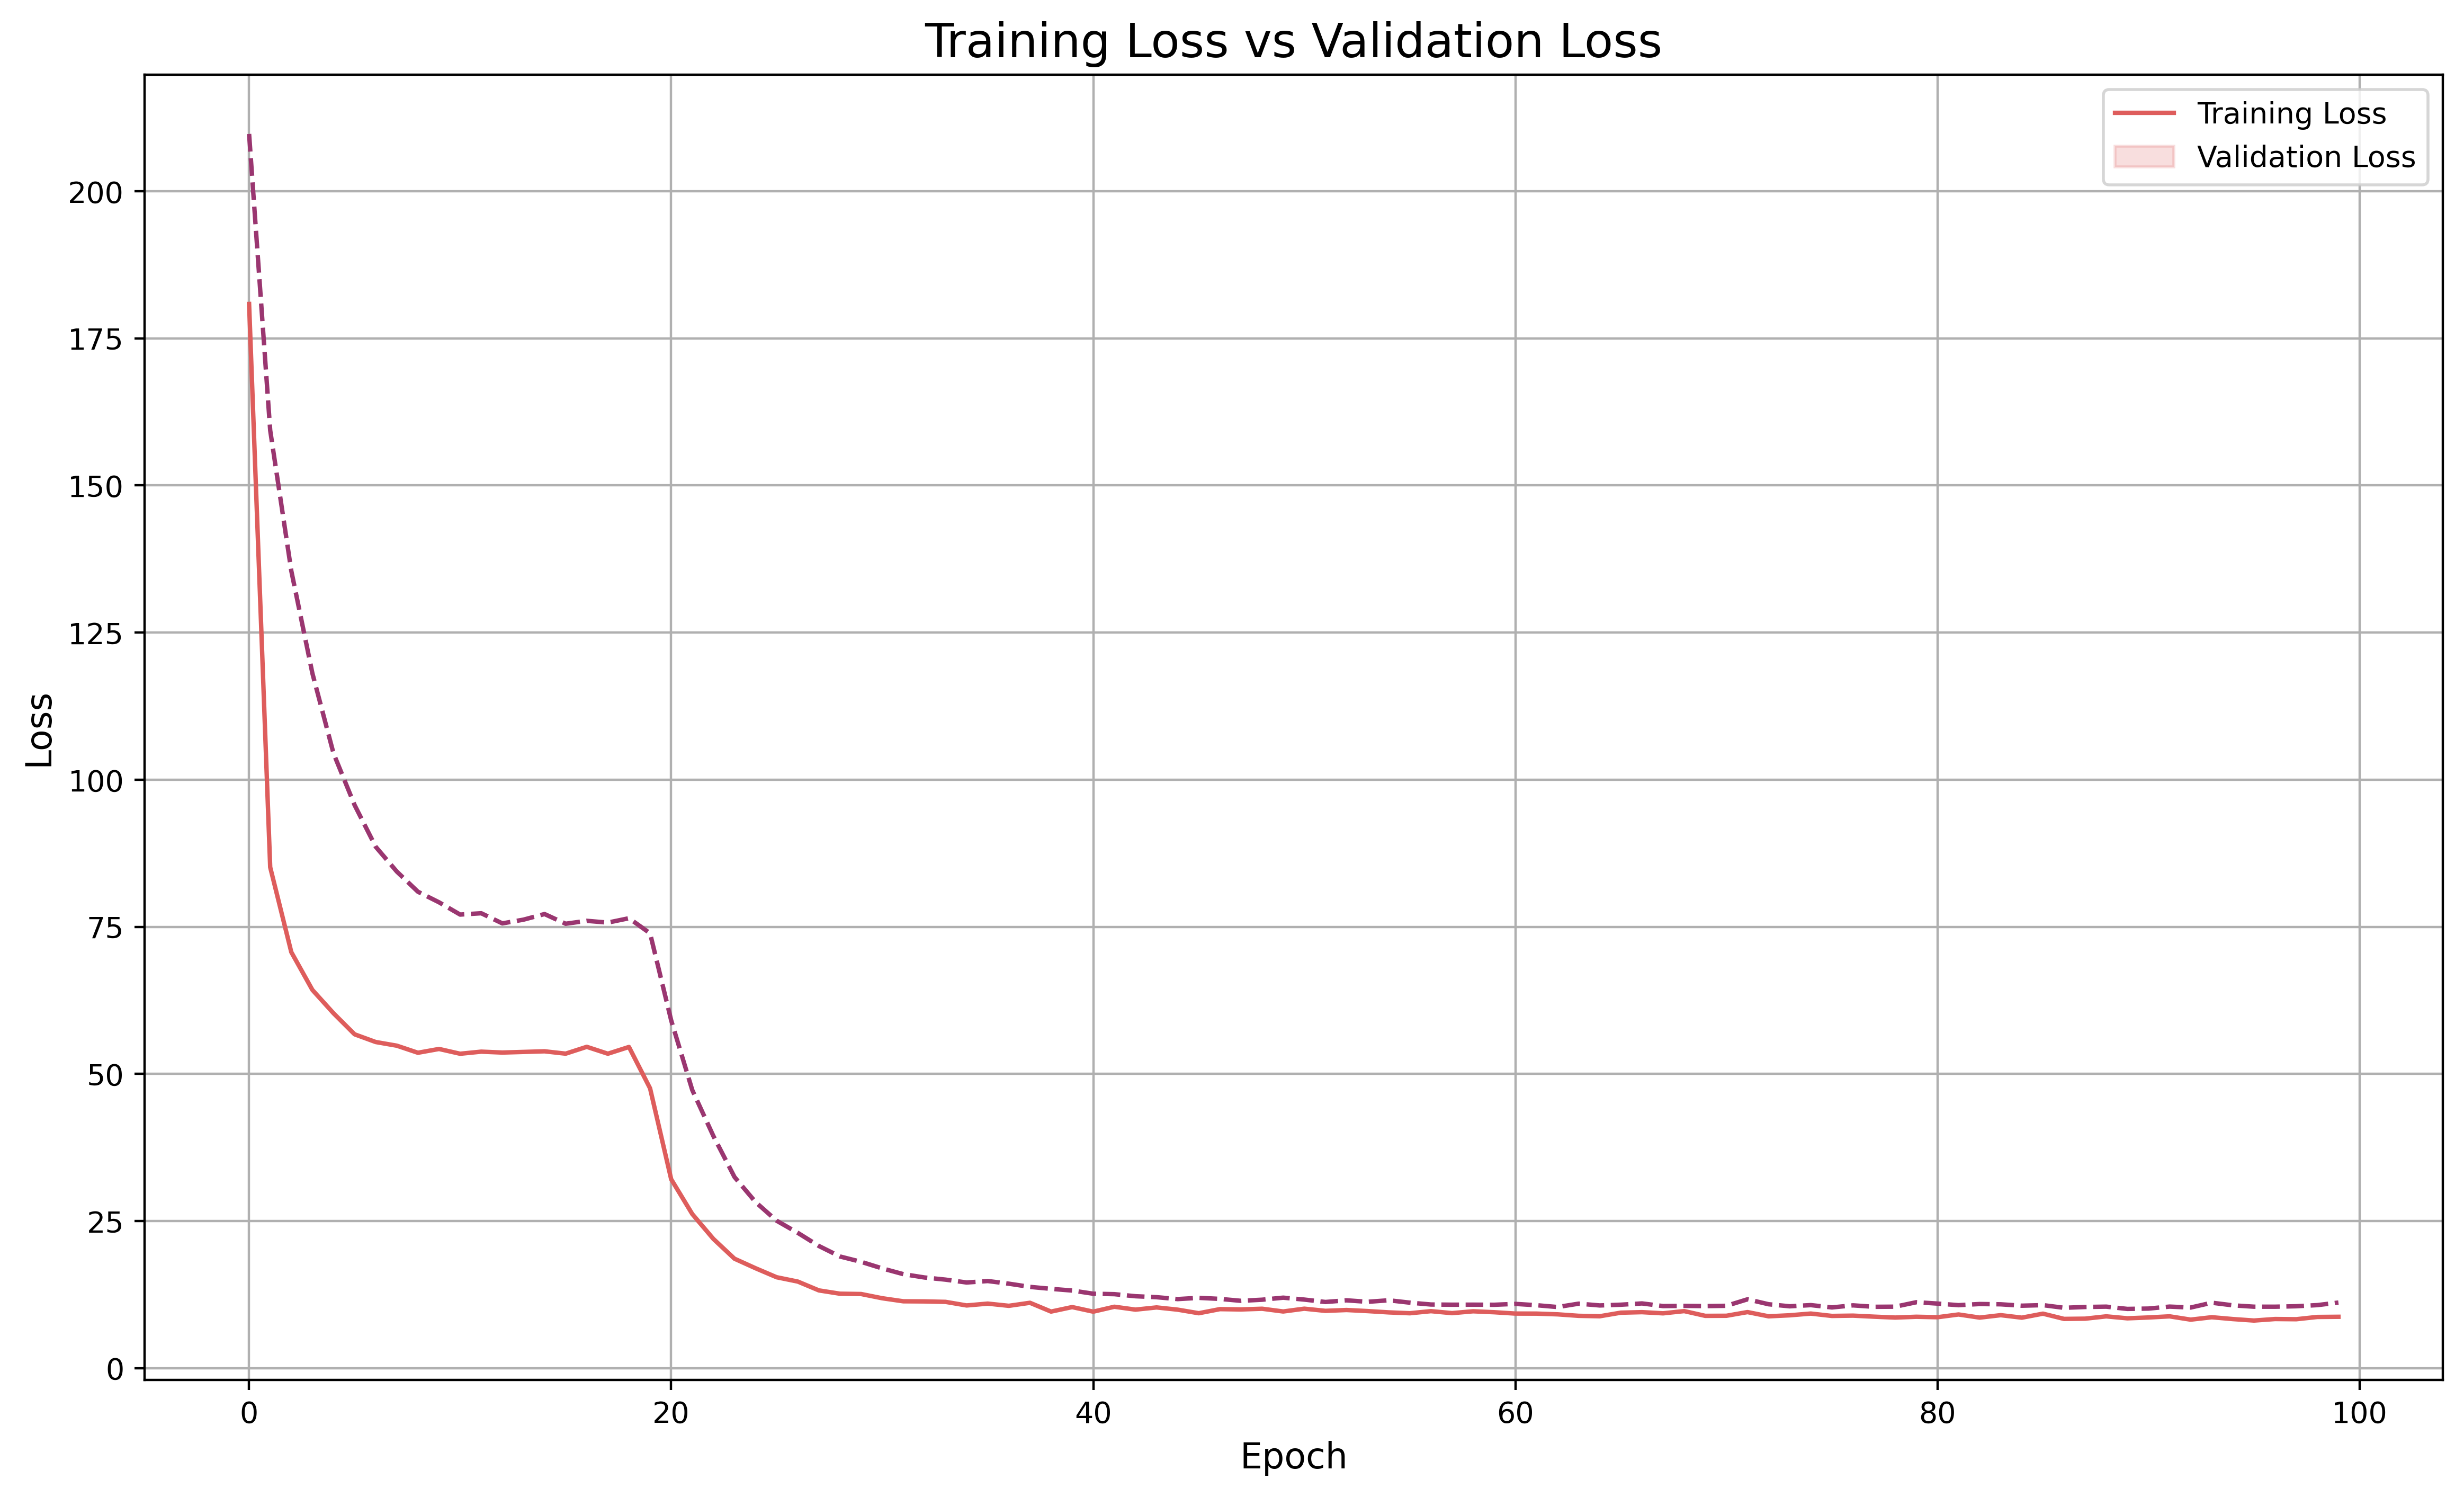

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `his` is a DataFrame with 'loss' and 'val_loss' columns
history_loss = his[['loss', 'val_loss']]

# Plotting
plt.figure(figsize=(14, 8), dpi=400)
plt.title("Training Loss vs Validation Loss", fontsize=16)

sns.lineplot(data=history_loss, palette="flare")
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.legend(["Training Loss", "Validation Loss"])
plt.grid(True)
plt.show()


In [ ]:
train_pred = regressor.predict(X_train).flatten()
val_pred = regressor.predict(X_val).flatten()
test_pred = regressor.predict(X_test).flatten()

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


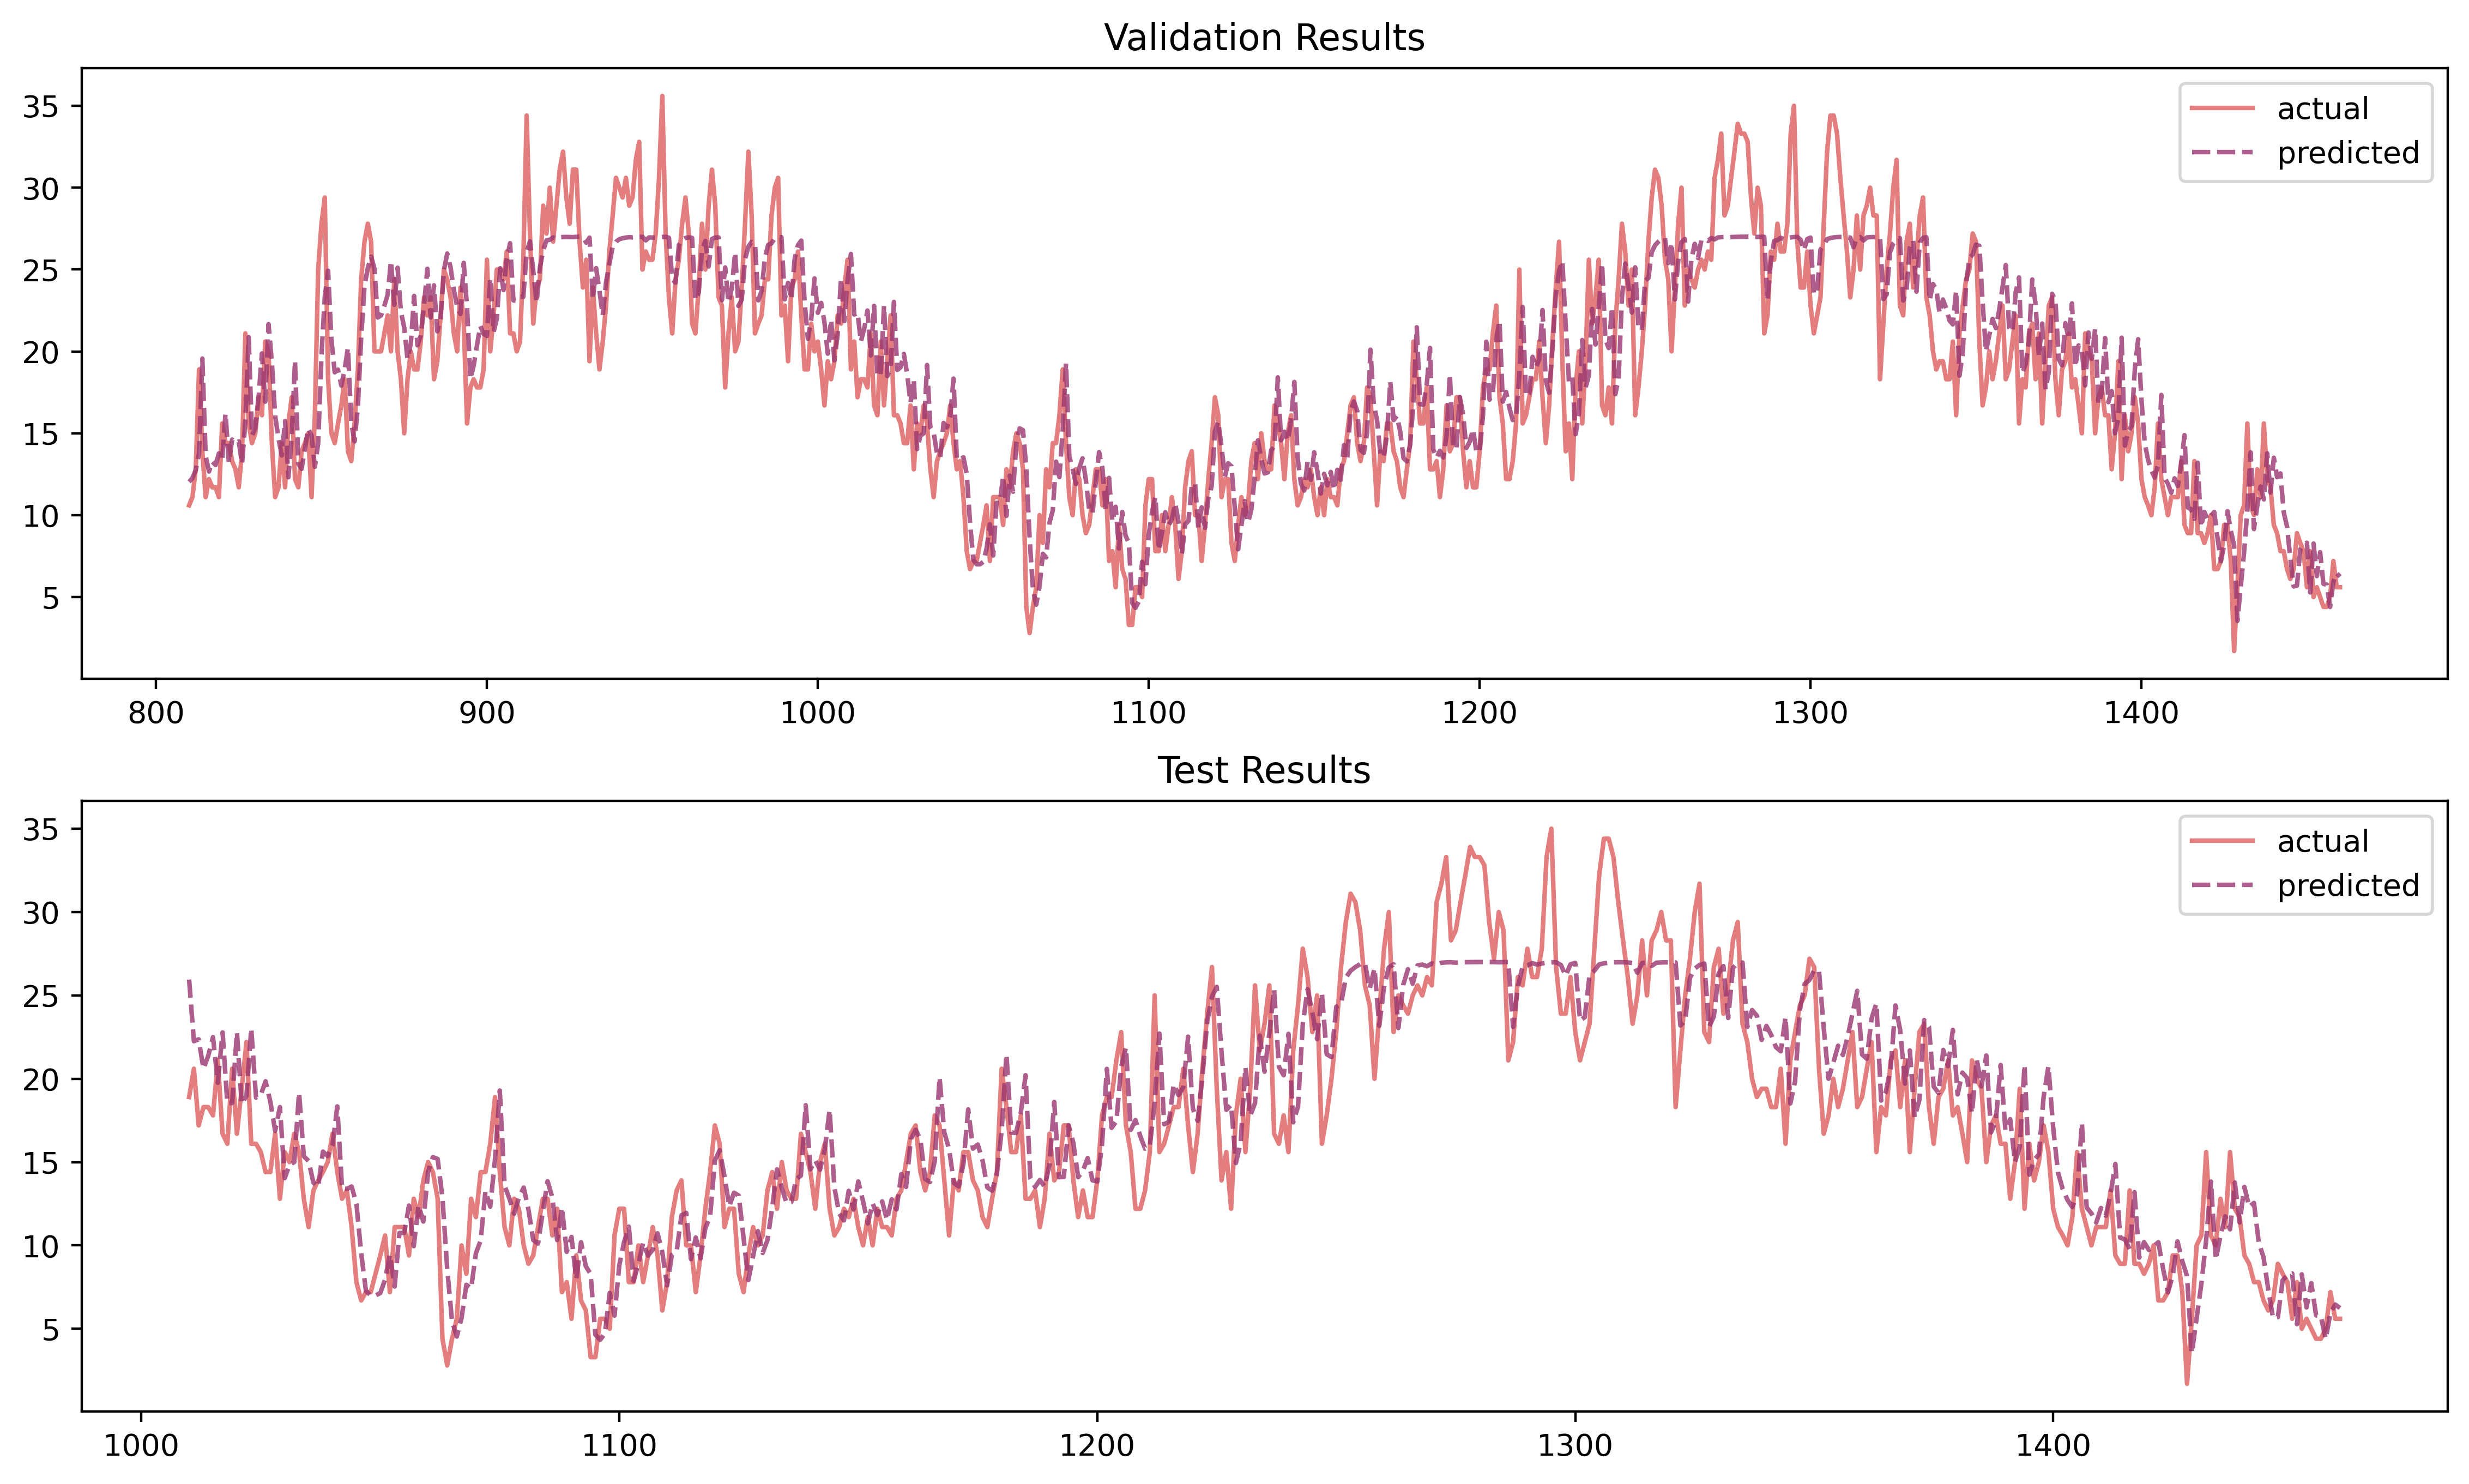

In [ ]:
pred = np.concatenate([train_pred,val_pred,test_pred])
df_pred = pd.DataFrame(df["temp_max"].copy())
df_pred.columns=["actual"]
df_pred = df_pred[WINDOW:]
df_pred["predicted"] = pred

fig,axes = plt.subplots(2,1,figsize=(14,8),dpi=400)

plt.subplot(2,1,1)
plt.title("Validation Results")
sns.lineplot(df_pred[800:],alpha=0.8,palette="flare",linestyle=None);

plt.subplot(2,1,2)
plt.title("Test Results")
sns.lineplot(df_pred[1000:],alpha=0.8,palette="flare",linestyle=None);